# Eye image processing playground

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls

detectors	       eyes		Untitled2.ipynb  venv
eye_detection_demo.py  Untitled1.ipynb	Untitled.ipynb


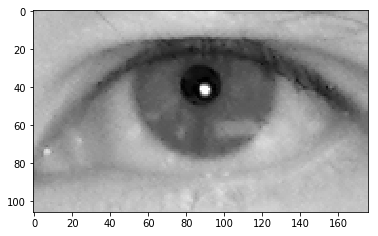

In [237]:
# Load the image, crop all eyebrows
eye = cv2.imread("eyes/123.png", 0)
img_length = eye.shape[0]
eye = eye[round(img_length*0.2):round(img_length*0.8), :]
plt.imshow(eye, cmap = 'gray')

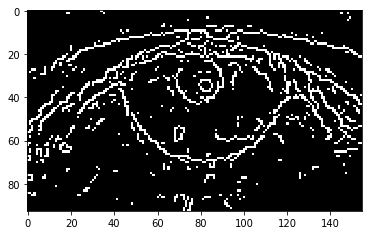

In [109]:
edges = cv2.Canny(eye, 70, 70)
plt.imshow(edges,cmap = 'gray')
plt.show()

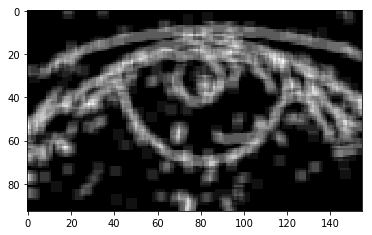

In [110]:
smoothed = cv2.blur(edges, (5, 5))
plt.imshow(smoothed,cmap = 'gray')
plt.show()

In [111]:
min_radius = round(smoothed.shape[1] * 0.15)
max_radius = round(smoothed.shape[1] * 0.25)

circles = cv2.HoughCircles(smoothed, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=25, minRadius=min_radius, maxRadius=max_radius)
circles

array([[[91.5, 47.5, 32.9],
        [58.5, 47.5, 25.2]]], dtype=float32)

In [112]:
circles.shape

(1, 2, 3)

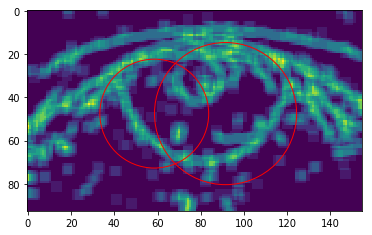

In [113]:
fig, ax = plt.subplots()
ax.imshow(smoothed)
for i in circles[0, :]:
    ax.add_artist(plt.Circle((i[0], i[1]), radius=i[2], fill=False, ec='r'))
fig.show()

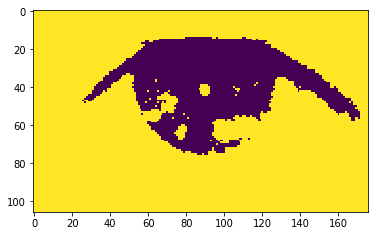

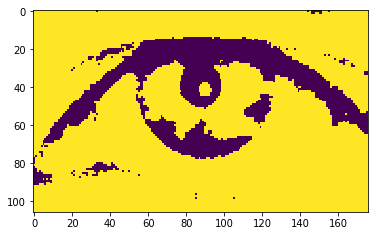

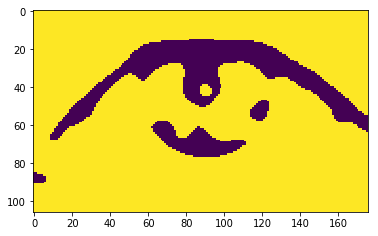

In [247]:
_,th1 = cv2.threshold(eye, 100, 255, cv2.THRESH_BINARY)
th3 = cv2.adaptiveThreshold(eye,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 45, 20)
plt.imshow(th1)
plt.show()
plt.imshow(th3)
plt.show()

smoothed_th3 = cv2.blur(th3, (8, 8))
_, smoothed_th3 = cv2.threshold(smoothed_th3, 100, 255, cv2.THRESH_BINARY)
plt.imshow(smoothed_th3)
plt.show()

2-46px


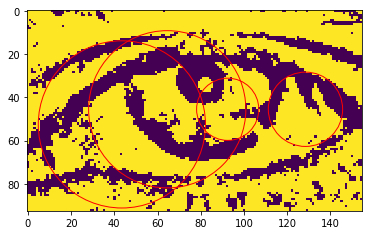

In [172]:
# Detect the inner eye
min_radius = round(smoothed.shape[1] * 0.01)
max_radius = round(smoothed.shape[1] * 0.3)
print("{}-{}px".format(min_radius, max_radius))

circles = cv2.HoughCircles(th3, cv2.HOUGH_GRADIENT, 1, 20, param1=40, param2=25, minRadius=min_radius, maxRadius=max_radius)
fig, ax = plt.subplots()
ax.imshow(th3)
if type(circles) != type(None):
    for i in circles[0, :]:
        ax.add_artist(plt.Circle((i[0], i[1]), radius=i[2], fill=False, ec='r'))
fig.show()

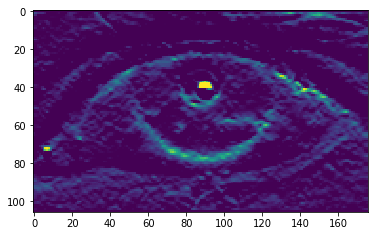

In [249]:
kernel = np.array(
    [[1, 2, 1],
     [0, 0, 0],
     [-1, -2, -1]]
)*-1
dst = cv2.filter2D(eye,-1,kernel)
_, dst_th = cv2.threshold(dst, 100, 255, cv2.THRESH_BINARY)
plt.imshow(dst)
plt.show()

In [225]:
dst_th[:, 40]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)